# ML Implementation

In [1]:
# import libraries
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
import lightgbm as ltb
import xgboost as xgb
import catboost as catb
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV

In [2]:
# import dataset
df = pd.read_csv("./cleaned_data/mental_health_data_2016-2021_ready_for_ML.csv")
df.head(3)

,Unnamed: 0.1,Unnamed: 0,age,sex,self-employed,working_country,living_country,mental_illness_family_history,have_mental_illness,mental_disorder_in_the_past,...,mental_health_benefits_from_current_employer_3,mental_health_benefits_from_current_employer_4,discussing_mental_health_with_coworkers_0,discussing_mental_health_with_coworkers_1,discussing_mental_health_with_coworkers_2,discussing_mental_health_with_coworkers_3,discussing_mental_health_with_supervisor_0,discussing_mental_health_with_supervisor_1,discussing_mental_health_with_supervisor_2,discussing_mental_health_with_supervisor_3
0,0,0,22,1,0,13,13,1,0,4,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,10,1,0,6,6,2,1,4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,2,21,1,0,13,13,1,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [3]:
# drop unnamed columns
df = df.drop('Unnamed: 0', 1)
df = df.drop('Unnamed: 0.1', 1)
df = df.drop('age', 1)
df = df.drop('sex', 1)

# Check all values of y
#df['Have_mental_illness'].value_counts()

<ipython-input-3-1c61ef6dee5a>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0', 1)
<ipython-input-3-1c61ef6dee5a>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0.1', 1)
<ipython-input-3-1c61ef6dee5a>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('age', 1)
<ipython-input-3-1c61ef6dee5a>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('sex', 1)


In [4]:
df

,self-employed,working_country,living_country,mental_illness_family_history,have_mental_illness,mental_disorder_in_the_past,number_of_employees_your_company_has,mental_health_benefits_from_previous_employers,mental_illness_diagnosis,mental_health_benefits_from_current_employer,...,mental_health_benefits_from_current_employer_3,mental_health_benefits_from_current_employer_4,discussing_mental_health_with_coworkers_0,discussing_mental_health_with_coworkers_1,discussing_mental_health_with_coworkers_2,discussing_mental_health_with_coworkers_3,discussing_mental_health_with_supervisor_0,discussing_mental_health_with_supervisor_1,discussing_mental_health_with_supervisor_2,discussing_mental_health_with_supervisor_3
0,0,13,13,1,0,4,2,2,2,3,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,6,6,2,1,4,0,4,2,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,13,13,1,0,1,0,2,1,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,13,13,1,1,4,5,3,2,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,6,6,2,1,4,0,0,2,4,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,0,6,6,2,1,2,1,0,2,4,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1755,0,6,6,1,0,2,1,0,0,4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1756,1,6,6,0,0,0,5,3,0,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1757,0,6,6,0,1,4,2,3,2,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


### LightGBM default

In [5]:
# Create train and test datasets
y=df["have_mental_illness"]
X=df.drop("have_mental_illness", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [6]:
model_lgbm = ltb.LGBMClassifier()
model_lgbm.fit(X_train, y_train)
expected_y_lgbm  = y_test
predicted_y_lgbm = model_lgbm.predict(X_test)

In [7]:
print(metrics.classification_report(expected_y_lgbm, predicted_y_lgbm))
print(metrics.confusion_matrix(expected_y_lgbm, predicted_y_lgbm))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       162
           1       0.91      0.95      0.93       190

    accuracy                           0.93       352
   macro avg       0.93      0.92      0.93       352
weighted avg       0.93      0.93      0.93       352

[[145  17]
 [  9 181]]


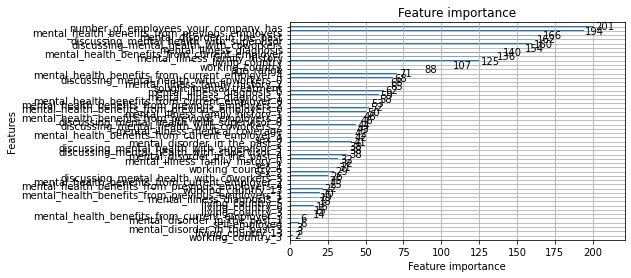

<Figure size 1152x864 with 0 Axes>

In [8]:
# Feature importance plot
ltb.plot_importance(model_lgbm)
plt.figure(figsize = (16, 12))
plt.show()

### XGBoost default

In [11]:
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train, y_train)
expected_y_xgb  = y_test
predicted_y_xgb = model_xgb.predict(X_test)

In [12]:
print(metrics.classification_report(expected_y_xgb, predicted_y_xgb))
print(metrics.confusion_matrix(expected_y_xgb, predicted_y_xgb))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       162
           1       0.92      0.95      0.94       190

    accuracy                           0.93       352
   macro avg       0.93      0.93      0.93       352
weighted avg       0.93      0.93      0.93       352

[[146  16]
 [  9 181]]


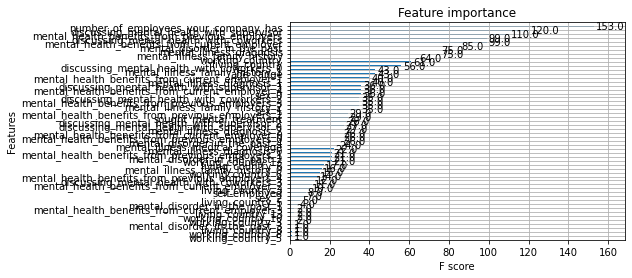

<Figure size 1152x864 with 0 Axes>

In [14]:
# Feature importance plot
xgb.plot_importance(model_xgb)
plt.figure(figsize = (16, 12))
plt.show()

### CatBoost default

In [15]:
model_catb = catb.CatBoostClassifier()
model_catb.fit(X_train, y_train)
expected_y_catb  = y_test
predicted_y_catb = model_catb.predict(X_test)

Learning rate set to 0.011919
0:	learn: 0.6803158	total: 66.4ms	remaining: 1m 6s
1:	learn: 0.6666806	total: 69.1ms	remaining: 34.5s
2:	learn: 0.6521681	total: 71.5ms	remaining: 23.8s
3:	learn: 0.6383129	total: 73.8ms	remaining: 18.4s
4:	learn: 0.6252476	total: 75.1ms	remaining: 14.9s
5:	learn: 0.6147360	total: 77.6ms	remaining: 12.9s
6:	learn: 0.6035337	total: 79.9ms	remaining: 11.3s
7:	learn: 0.5933288	total: 82.3ms	remaining: 10.2s
8:	learn: 0.5840103	total: 83.4ms	remaining: 9.18s
9:	learn: 0.5719380	total: 85.6ms	remaining: 8.47s
10:	learn: 0.5601592	total: 87.7ms	remaining: 7.88s
11:	learn: 0.5497211	total: 90.4ms	remaining: 7.44s
12:	learn: 0.5414887	total: 92.3ms	remaining: 7.01s
13:	learn: 0.5323529	total: 94.4ms	remaining: 6.65s
14:	learn: 0.5229079	total: 96.4ms	remaining: 6.33s
15:	learn: 0.5147498	total: 98.2ms	remaining: 6.04s
16:	learn: 0.5053542	total: 100ms	remaining: 5.79s
17:	learn: 0.4961333	total: 102ms	remaining: 5.56s
18:	learn: 0.4869433	total: 104ms	remaining: 5

In [16]:
print(metrics.classification_report(expected_y_catb, predicted_y_catb))
print(metrics.confusion_matrix(expected_y_catb, predicted_y_catb))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       162
           1       0.91      0.98      0.94       190

    accuracy                           0.94       352
   macro avg       0.94      0.93      0.94       352
weighted avg       0.94      0.94      0.94       352

[[144  18]
 [  4 186]]



# ----------------------------------------------------------------

## Parameter tuning

In [21]:
# Parameters used 

parameters = {'depth'         : [4, 5, 6, 7, 8, 9, 10],
              'learning_rate' : [0.1, 0.05, 0.01, 0.02, 0.03, 0.04],
              'iterations'    : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
}

### CatBoost tuned

In [25]:
grid_search_catb = GridSearchCV(estimator=model_catb, param_grid = parameters, cv = 5, n_jobs=-1)
grid_search_catb.fit(X_train, y_train)

print(" ---Grid Search Results---" )
print("\n The best estimator: \n",grid_search_catb.best_estimator_)
print("\n The best score: \n",grid_search_catb.best_score_)
print("\n The best parameters:\n",grid_search_catb.best_params_)

0:	learn: 0.6613901	total: 1.8ms	remaining: 178ms
1:	learn: 0.6283623	total: 3.66ms	remaining: 179ms
2:	learn: 0.6023542	total: 4.71ms	remaining: 152ms
3:	learn: 0.5776416	total: 5.52ms	remaining: 133ms
4:	learn: 0.5498317	total: 6.41ms	remaining: 122ms
5:	learn: 0.5220835	total: 7.29ms	remaining: 114ms
6:	learn: 0.5041878	total: 7.88ms	remaining: 105ms
7:	learn: 0.4860826	total: 8.71ms	remaining: 100ms
8:	learn: 0.4705530	total: 10.3ms	remaining: 104ms
9:	learn: 0.4514927	total: 11.3ms	remaining: 101ms
10:	learn: 0.4386486	total: 11.9ms	remaining: 96.3ms
11:	learn: 0.4257360	total: 12.9ms	remaining: 94.4ms
12:	learn: 0.4133156	total: 13.8ms	remaining: 92.6ms
13:	learn: 0.3963525	total: 15ms	remaining: 92ms
14:	learn: 0.3820968	total: 16.2ms	remaining: 91.8ms
15:	learn: 0.3725263	total: 17.2ms	remaining: 90.2ms
16:	learn: 0.3600031	total: 18.6ms	remaining: 90.6ms
17:	learn: 0.3517292	total: 19.9ms	remaining: 90.7ms
18:	learn: 0.3408012	total: 21.1ms	remaining: 90ms
19:	learn: 0.3316348

In [26]:
model_catb_tuned = catb.CatBoostClassifier(
    depth=5, iterations=100, learning_rate=0.03
)
model_catb_tuned.fit(X_train, y_train)
expected_y_catb_tuned  = y_test
predicted_y_catb_tuned = model_catb_tuned.predict(X_test)

0:	learn: 0.6613901	total: 1.86ms	remaining: 184ms
1:	learn: 0.6283623	total: 3.63ms	remaining: 178ms
2:	learn: 0.6023542	total: 5.26ms	remaining: 170ms
3:	learn: 0.5776416	total: 6.47ms	remaining: 155ms
4:	learn: 0.5498317	total: 8.18ms	remaining: 155ms
5:	learn: 0.5220835	total: 9.78ms	remaining: 153ms
6:	learn: 0.5041878	total: 10.7ms	remaining: 142ms
7:	learn: 0.4860826	total: 12ms	remaining: 138ms
8:	learn: 0.4705530	total: 13.5ms	remaining: 137ms
9:	learn: 0.4514927	total: 15.1ms	remaining: 136ms
10:	learn: 0.4386486	total: 16.2ms	remaining: 131ms
11:	learn: 0.4257360	total: 17.6ms	remaining: 129ms
12:	learn: 0.4133156	total: 18.7ms	remaining: 125ms
13:	learn: 0.3963525	total: 20ms	remaining: 123ms
14:	learn: 0.3820968	total: 21.2ms	remaining: 120ms
15:	learn: 0.3725263	total: 22.2ms	remaining: 117ms
16:	learn: 0.3600031	total: 23.3ms	remaining: 114ms
17:	learn: 0.3517292	total: 24.4ms	remaining: 111ms
18:	learn: 0.3408012	total: 25.5ms	remaining: 109ms
19:	learn: 0.3316348	total

In [27]:
print(metrics.classification_report(expected_y_catb_tuned, predicted_y_catb_tuned))
print(metrics.confusion_matrix(expected_y_catb_tuned, predicted_y_catb_tuned))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       162
           1       0.91      0.97      0.94       190

    accuracy                           0.93       352
   macro avg       0.94      0.93      0.93       352
weighted avg       0.93      0.93      0.93       352

[[144  18]
 [  6 184]]


### XGBoost tuned

In [28]:
grid_search_xgb = GridSearchCV(estimator=model_xgb, param_grid = parameters, cv = 5, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

print(" ---Grid Search Results---" )
print("\n The best estimator: \n",grid_search_xgb.best_estimator_)
print("\n The best score: \n",grid_search_xgb.best_score_)
print("\n The best parameters:\n",grid_search_xgb.best_params_)

[13:42:32] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "depth", "iterations" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


 ---Grid Search Results---

 The best estimator: 
 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              depth=4, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', iterations=10,
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_l

In [35]:
model_xgb_tuned = xgb.XGBClassifier(
    depth=4, iterations=10, learning_rate=0.01
)
model_xgb_tuned.fit(X_train, y_train)
expected_y_xgb_tuned  = y_test
predicted_y_xgb_tuned = model_xgb_tuned.predict(X_test)

[13:46:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "depth", "iterations" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [36]:
print(metrics.classification_report(expected_y_xgb_tuned, predicted_y_xgb_tuned))
print(metrics.confusion_matrix(expected_y_xgb_tuned, predicted_y_xgb_tuned))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       162
           1       0.91      0.97      0.94       190

    accuracy                           0.93       352
   macro avg       0.94      0.93      0.93       352
weighted avg       0.93      0.93      0.93       352

[[144  18]
 [  6 184]]


### LightGBM tuned

In [37]:
grid_search_lgbm = GridSearchCV(estimator=model_lgbm, param_grid = parameters, cv = 5, n_jobs=-1)
grid_search_lgbm.fit(X_train, y_train)

print(" ---Grid Search Results---" )
print("\n The best estimator: \n",grid_search_lgbm.best_estimator_)
print("\n The best score: \n",grid_search_lgbm.best_score_)
print("\n The best parameters:\n",grid_search_lgbm.best_params_)

[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
 ---Grid Search Results---

 The best estimator: 
 LGBMClassifier(depth=4, iterations=10, learning_rate=0.01)

 The best score: 
 0.9324726786300195

 The best parameters:
 {'depth': 4, 'iterations': 10, 'learning_rate': 0.01}


In [39]:
model_lgbm_tuned = ltb.LGBMClassifier(
         depth=4, iterations=10, learning_rate=0.01
)
model_lgbm_tuned.fit(X_train, y_train)
expected_y_lgbm_tuned = y_test
predicted_y_lgbm_tuned = model_lgbm_tuned.predict(X_test)

In [40]:
print(metrics.classification_report(expected_y_lgbm_tuned, predicted_y_lgbm_tuned))
print(metrics.confusion_matrix(expected_y_lgbm_tuned, predicted_y_lgbm_tuned))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       162
           1       0.90      0.99      0.94       190

    accuracy                           0.94       352
   macro avg       0.94      0.93      0.94       352
weighted avg       0.94      0.94      0.94       352

[[142  20]
 [  2 188]]


# -----------------------------------------------------------------------------

## K-fold cross-validation with tuned models

In [41]:
# classification report
original_data = []
predicted_data = []

#Make our customer score
def classification_report_all_scores(y_true, y_predicted):
    original_data.extend(y_true)
    predicted_data.extend(y_predicted)
    return accuracy_score(y_true, y_predicted) # return accuracy score

### LightGBM default with 5-fold Cross-validation

In [42]:
from sklearn.model_selection import cross_val_score
model_lgbm_5fold = ltb.LGBMClassifier(depth=4, iterations=10, learning_rate=0.01)
model_lgbm_5fold.fit(X_train, y_train)
model_lgbm_5fold.score(X_test, y_test)

[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations


0.9375

In [43]:
# classification report
original_data_lgbm = []
predicted_data_lgbm = []

#Make our customer score
def classification_report_all_scores(y_true, y_predicted):
    original_data_lgbm.extend(y_true)
    predicted_data_lgbm.extend(y_predicted)
    return accuracy_score(y_true, y_predicted)

# Parameter tuning with cross validation
lgbm_tuned_score = cross_val_score(ltb.LGBMClassifier(depth=4, iterations=10, learning_rate=0.01), X=X, y=y, cv=5, scoring=make_scorer(classification_report_all_scores))
print(classification_report(original_data_lgbm, predicted_data_lgbm))
print(metrics.confusion_matrix(original_data_lgbm, predicted_data_lgbm))

[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       805
           1       0.90      0.99      0.94       954

    accuracy                           0.93      1759
   macro avg       0.94      0.93      0.93      1759
weighted avg       0.94      0.93      0.93      1759

[[702 103]
 [ 14 940]]


### XGBoost default with 5-fold Cross-validation

In [44]:
model_xgb_5fold = xgb.XGBClassifier(depth=4, iterations=10, learning_rate=0.05)
model_xgb_5fold.fit(X_train, y_train)
model_xgb_5fold.score(X_test, y_test)

[14:02:04] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "depth", "iterations" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.9289772727272727

In [45]:
# classification report
original_data_xgb = []
predicted_data_xgb = []

#Make our customer score
def classification_report_all_scores(y_true, y_predicted):
    original_data_xgb.extend(y_true)
    predicted_data_xgb.extend(y_predicted)
    return accuracy_score(y_true, y_predicted)

# Parameter tuning with cross validation
xgb_tuned_score = cross_val_score(xgb.XGBClassifier(depth=4, iterations=10, learning_rate=0.05), X=X, y=y, cv=5, scoring=make_scorer(classification_report_all_scores))
print(classification_report(original_data_xgb, predicted_data_xgb))
print(metrics.confusion_matrix(original_data_xgb, predicted_data_xgb))

[14:02:13] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "depth", "iterations" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:02:14] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "depth", "iterations" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:02:14] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.m

### CatBoost tuned with 5-fold Cross-validation

In [46]:
model_catb_5fold = catb.CatBoostClassifier(depth=4, iterations=30, learning_rate=0.1)
model_catb_5fold.fit(X_train, y_train)
model_catb_5fold.score(X_test, y_test)

0:	learn: 0.5954504	total: 6.21ms	remaining: 180ms
1:	learn: 0.5065095	total: 7.29ms	remaining: 102ms
2:	learn: 0.4493132	total: 8.27ms	remaining: 74.4ms
3:	learn: 0.3956531	total: 9.24ms	remaining: 60.1ms
4:	learn: 0.3650487	total: 10.2ms	remaining: 50.9ms
5:	learn: 0.3399482	total: 11ms	remaining: 44.1ms
6:	learn: 0.3085932	total: 11.9ms	remaining: 39.1ms
7:	learn: 0.2862253	total: 12.8ms	remaining: 35.2ms
8:	learn: 0.2746418	total: 13.8ms	remaining: 32.1ms
9:	learn: 0.2662253	total: 14.7ms	remaining: 29.5ms
10:	learn: 0.2555035	total: 15.7ms	remaining: 27ms
11:	learn: 0.2472856	total: 16.6ms	remaining: 24.9ms
12:	learn: 0.2426411	total: 17.5ms	remaining: 22.9ms
13:	learn: 0.2364466	total: 18.5ms	remaining: 21.1ms
14:	learn: 0.2318956	total: 19.4ms	remaining: 19.4ms
15:	learn: 0.2294359	total: 20.2ms	remaining: 17.7ms
16:	learn: 0.2263253	total: 21.2ms	remaining: 16.2ms
17:	learn: 0.2216902	total: 21.9ms	remaining: 14.6ms
18:	learn: 0.2180439	total: 22.8ms	remaining: 13.2ms
19:	learn

0.9318181818181818

In [47]:
# classification report
original_data_catb = []
predicted_data_catb = []

#Make our customer score
def classification_report_all_scores(y_true, y_predicted):
    original_data_catb.extend(y_true)
    predicted_data_catb.extend(y_predicted)
    return accuracy_score(y_true, y_predicted)

# Parameter tuning with cross validation
catb_tuned_score = cross_val_score(catb.CatBoostClassifier(depth=4, iterations=30, learning_rate=0.1), X=X, y=y, cv=5, scoring=make_scorer(classification_report_all_scores))
print(classification_report(original_data_catb, predicted_data_catb)) 
print(metrics.confusion_matrix(original_data_catb, predicted_data_catb))

0:	learn: 0.5875755	total: 1.67ms	remaining: 48.3ms
1:	learn: 0.4953008	total: 3.5ms	remaining: 49ms
2:	learn: 0.4378450	total: 4.79ms	remaining: 43.1ms
3:	learn: 0.3940834	total: 6.28ms	remaining: 40.8ms
4:	learn: 0.3598405	total: 7.64ms	remaining: 38.2ms
5:	learn: 0.3335388	total: 8.92ms	remaining: 35.7ms
6:	learn: 0.2995623	total: 10.4ms	remaining: 34.1ms
7:	learn: 0.2741395	total: 11.9ms	remaining: 32.7ms
8:	learn: 0.2585694	total: 13.2ms	remaining: 30.7ms
9:	learn: 0.2499457	total: 14.4ms	remaining: 28.7ms
10:	learn: 0.2375258	total: 15.8ms	remaining: 27.2ms
11:	learn: 0.2311595	total: 17.1ms	remaining: 25.7ms
12:	learn: 0.2266169	total: 18.5ms	remaining: 24.1ms
13:	learn: 0.2209280	total: 19.7ms	remaining: 22.5ms
14:	learn: 0.2168263	total: 20.9ms	remaining: 20.9ms
15:	learn: 0.2144179	total: 22.3ms	remaining: 19.5ms
16:	learn: 0.2112033	total: 23.4ms	remaining: 17.9ms
17:	learn: 0.2061202	total: 24.7ms	remaining: 16.5ms
18:	learn: 0.2043428	total: 26.1ms	remaining: 15.1ms
19:	le